# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Daffa Stefian Abyansyah
- **Email:** daffastefian.2020@student.uny.ac.id
- **ID Dicoding:** daffastefian

## Menentukan Pertanyaan Bisnis

- Bagaimana sebaran data dari status order?
- Produk apa yang paling banyak terjual?
- Produk apa yang memiliki revenue tertinggi?
- Di negara bagian mana pelanggan paling banyak melakukan pembelian?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [87]:
# Load Data Customer
customers_df = pd.read_csv("https://raw.githubusercontent.com/daffastefian/ecommerce-dataanalysis/master/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [88]:
# Load Data Customer
orders_df = pd.read_csv("https://raw.githubusercontent.com/daffastefian/ecommerce-dataanalysis/master/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [89]:
# Load Data Customer
order_items_df = pd.read_csv("https://raw.githubusercontent.com/daffastefian/ecommerce-dataanalysis/master/data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [90]:
# Load Data Customer
products_df = pd.read_csv("https://raw.githubusercontent.com/daffastefian/ecommerce-dataanalysis/master/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [91]:
# Load Data Customer
products_translate_df = pd.read_csv("https://raw.githubusercontent.com/daffastefian/ecommerce-dataanalysis/master/data/product_category_name_translation.csv")
products_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Meskipun data yang disediakan banyak akan tetapi kita hanya perlu mengolah data yang berkaitan dengan pertanyaan yang telah didefinisikan

### Assessing Data

In [92]:
customers_df.info()
print("Jumlah duplikasi", customers_df.duplicated().sum())
customers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi 0


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [93]:
orders_df.info()
print("Jumlah duplikasi", orders_df.duplicated().sum())
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi 0


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [94]:
order_items_df.info()
print("Jumlah duplikasi", order_items_df.duplicated().sum())
order_items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi 0


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [95]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [96]:
products_df.info()
print("Jumlah duplikasi", products_df.duplicated().sum())
products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi 0


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [97]:
products_translate_df.info()
print("Jumlah duplikasi", products_translate_df.duplicated().sum())
products_translate_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi 0


,0
product_category_name,0
product_category_name_english,0


**Insight:**
- Customers : data yang diperlukan tidak memiliki masalah
- Orders : data yang diperlukan tidak memiliki masalah
- Order Items : data yang diperlukan tidak memiliki masalah
- Products : data yang diperlukan memiliki missing value

### Cleaning Data

In [98]:
customers_drop_cols = ['customer_unique_id',
                     'customer_zip_code_prefix',
                     'customer_city',]

customers_df.drop(customers_drop_cols, axis= 1, inplace= True)
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     99441 non-null  object
 1   customer_state  99441 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [100]:
orders_drop_cols = ['order_purchase_timestamp',
                     'order_approved_at',
                     'order_delivered_carrier_date',
                     'order_delivered_customer_date',
                     'order_estimated_delivery_date']

orders_df.drop(orders_drop_cols, axis= 1, inplace= True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      99441 non-null  object
 1   customer_id   99441 non-null  object
 2   order_status  99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [101]:
order_items_drop_cols = ['order_item_id',
                     'seller_id',
                     'shipping_limit_date',
                     'freight_value']

order_items_df.drop(order_items_drop_cols, axis= 1, inplace= True)
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   order_id    112650 non-null  object 
 1   product_id  112650 non-null  object 
 2   price       112650 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.6+ MB


In [102]:
products_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_photos_qty',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

products_df.drop(products_drop_cols, axis= 1, inplace= True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [103]:
products_df.dropna(inplace=True)
products_df.isna().sum()

,0
product_id,0
product_category_name,0


**Insight:**
- Semua kolom yang tidak diperlukan untuk menghasilkan data yang dapat digunakan untuk menjawab pertanyaan yang telah didefinisikan telah dihapus
- Sudah dipastikan tidak ada yang kosong

## Exploratory Data Analysis (EDA)

### Explore Product & Product Category Translation

In [104]:
final_products_df = products_df.merge(products_translate_df, on='product_category_name', how='left')
final_products_df = final_products_df.drop(columns=['product_category_name']).rename(columns={'product_category_name_english': 'product_category'})
final_products_df.head()

,product_id,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [108]:
final_products_df.groupby("product_category").product_id.nunique().sort_values(ascending=False)

,product_id
product_category,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


### Join Customers & Orders

In [105]:
merged_df = orders_df.merge(customers_df, on='customer_id', how='left')
merged_df.head()

,order_id,customer_id,order_status,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,SP


In [110]:
merged_df.groupby("customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Join dengan Order Items

In [106]:
merged_df = merged_df.merge(order_items_df, on='order_id', how='left')
merged_df.head()

,order_id,customer_id,order_status,customer_state,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,SP,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,BA,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,GO,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,RN,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,SP,65266b2da20d04dbe00c5c2d3bb7859e,19.90


### Join dengan Products

In [107]:
merged_df = merged_df.merge(final_products_df, on='product_id', how='left')
merged_df.head()

,order_id,customer_id,order_status,customer_state,product_id,price,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,SP,87285b34884572647811a353c7ac498a,29.99,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,GO,aa4383b373c6aca5d8797843e5594415,159.90,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,RN,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,SP,65266b2da20d04dbe00c5c2d3bb7859e,19.90,stationery


In [111]:
merged_df.groupby("product_category").agg({
    "order_id": "nunique",
    "price": ["min", "max"]
})

order_id  price         
                            nunique    min      max
product_category                                   
agro_industry_and_commerce      182  12.99  2990.00
air_conditioning                253  10.90  1599.00
art                             202   3.50  6499.00
arts_and_craftmanship            23   9.80   289.49
audio                           350  14.90   598.99
...                             ...    ...      ...
stationery                     2311   2.29  1693.00
tablets_printing_image           79  14.90   889.99
telephony                      4199   5.00  2428.00
toys                           3886   4.90  1699.99
watches_gifts                  5624   8.99  3999.90

[71 rows x 3 columns]

**Insight:**
- Data yang telah dibersihkan dapat diolah untuk menghasilkan insight untuk menjawab pertanyaan yang telah didefinisikan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Sebaran Data dari Status Order

<ipython-input-120-895df58e0783>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='pastel')


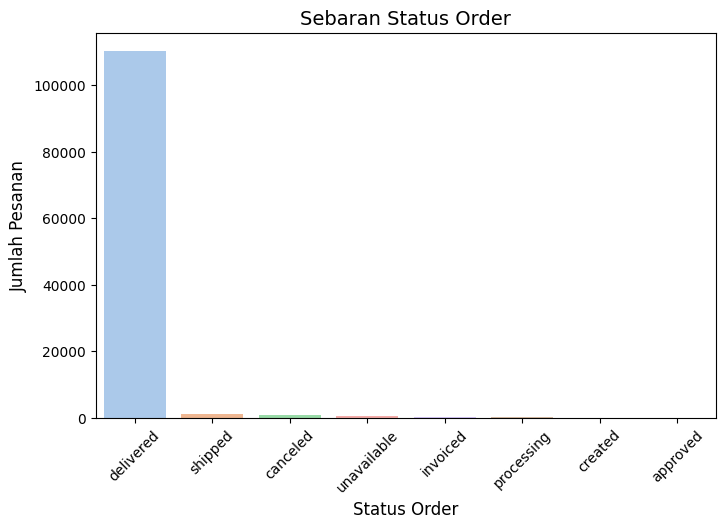

In [120]:
order_status_counts = merged_df['order_status'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='pastel')
plt.title("Sebaran Status Order", fontsize=14)
plt.xlabel("Status Order", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Produk yang Paling Banyak Terjual

<ipython-input-114-19af579a3f6a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sold_counts.index, x=sold_counts.values, palette='coolwarm')


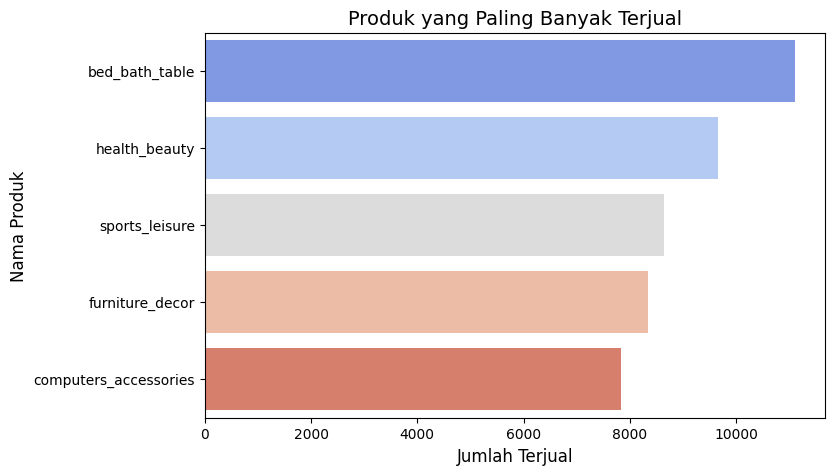

In [114]:
sold_counts = merged_df['product_category'].value_counts().head()
plt.figure(figsize=(8, 5))
sns.barplot(y=sold_counts.index, x=sold_counts.values, palette='coolwarm')
plt.title("Produk yang Paling Banyak Terjual", fontsize=14)
plt.xlabel("Jumlah Terjual", fontsize=12)
plt.ylabel("Nama Produk", fontsize=12)
plt.show()

### Pertanyaan 3: Produk dengan Revenue Tertinggi

<ipython-input-116-748ca5fdcc5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_revenue.index, x=product_revenue.values, palette='Blues_r')


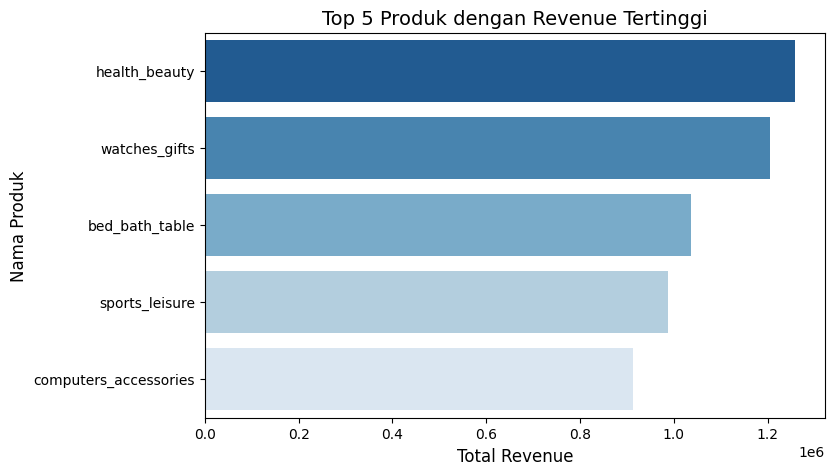

In [116]:
product_revenue = merged_df.groupby('product_category')['price'].sum().sort_values(ascending=False).head()
plt.figure(figsize=(8, 5))
sns.barplot(y=product_revenue.index, x=product_revenue.values, palette='Blues_r')
plt.title("Top 5 Produk dengan Revenue Tertinggi", fontsize=14)
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Nama Produk", fontsize=12)
plt.show()

### Pertanyaan 4: Negara Bagian dengan Pelanggan Terbanyak

<ipython-input-117-6b8f2efc3a6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_counts.index, x=state_counts.values, palette='viridis')


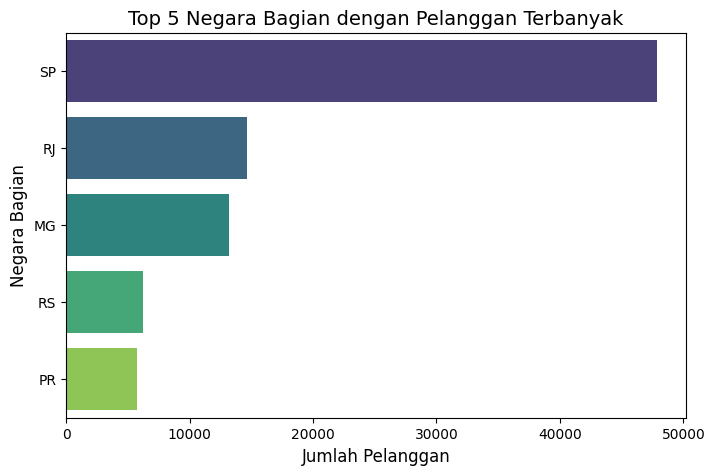

In [117]:
state_counts = merged_df['customer_state'].value_counts().head()
plt.figure(figsize=(8, 5))
sns.barplot(y=state_counts.index, x=state_counts.values, palette='viridis')
plt.title("Top 5 Negara Bagian dengan Pelanggan Terbanyak", fontsize=14)
plt.xlabel("Jumlah Pelanggan", fontsize=12)
plt.ylabel("Negara Bagian", fontsize=12)
plt.show()

## Conclusion

- Bagaimana sebaran data dari status order?
Dari visualisasi data yang telah dibuat, dapat dilihat bahwa mayoritas order berhasil diantar yang berarti penanganan order cukup baik.
- Produk apa yang paling banyak terjual?
Kategori produk bed_bath_table merupakan produk yang paling banyak dibeli oleh customer.
- Produk apa yang memiliki revenue tertinggi?
Kategori produk yang paling banyak menghasilkan revenue adalah health_beauty.
- Di negara bagian mana pelanggan paling banyak melakukan pembelian?
SP merupakan negara bagian yang paling banyak melakukan transaksi pembelian.